In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

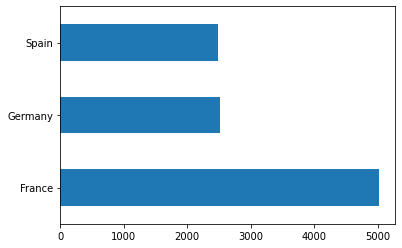

In [ ]:
## UnivariateAnalysis
df.Geography.value_counts().plot(kind='barh');
df.Geography.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

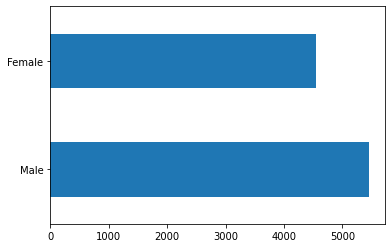

In [ ]:
df.Gender.value_counts().plot(kind='barh');
df.Gender.value_counts()

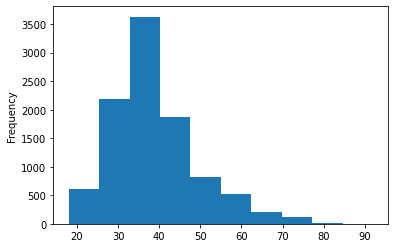

In [ ]:
df.Age.describe()
df.Age.plot(kind='hist')


2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

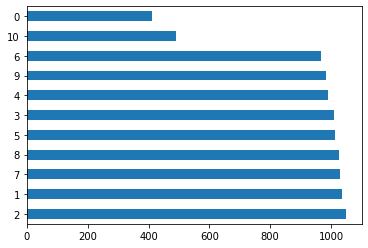

In [ ]:
df.Tenure.value_counts().sort_values(ascending=False).plot(kind='barh');
df.Tenure.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

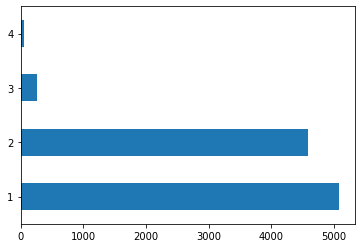

In [ ]:
df.NumOfProducts.value_counts().sort_values(ascending=False).plot(kind='barh');
df.NumOfProducts.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

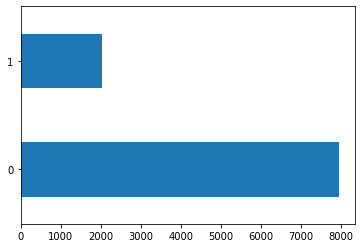

In [ ]:
df.Exited.value_counts().sort_values(ascending=False).plot(kind='barh');
df.Exited.value_counts()

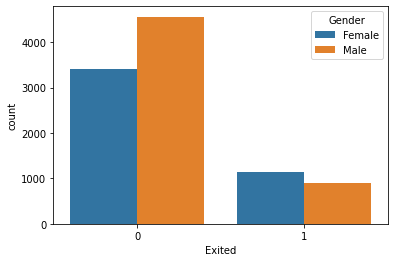

In [ ]:
#BivariateAnalysis
sns.countplot(x=df.Exited, hue=df.Gender)

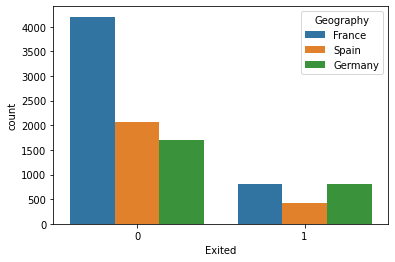

In [ ]:
sns.countplot(x=df.Exited, hue=df.Geography)


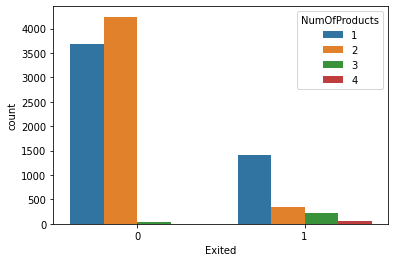

In [ ]:
sns.countplot(x=df.Exited, hue=df.NumOfProducts)


<function matplotlib.pyplot.show(*args, **kw)>

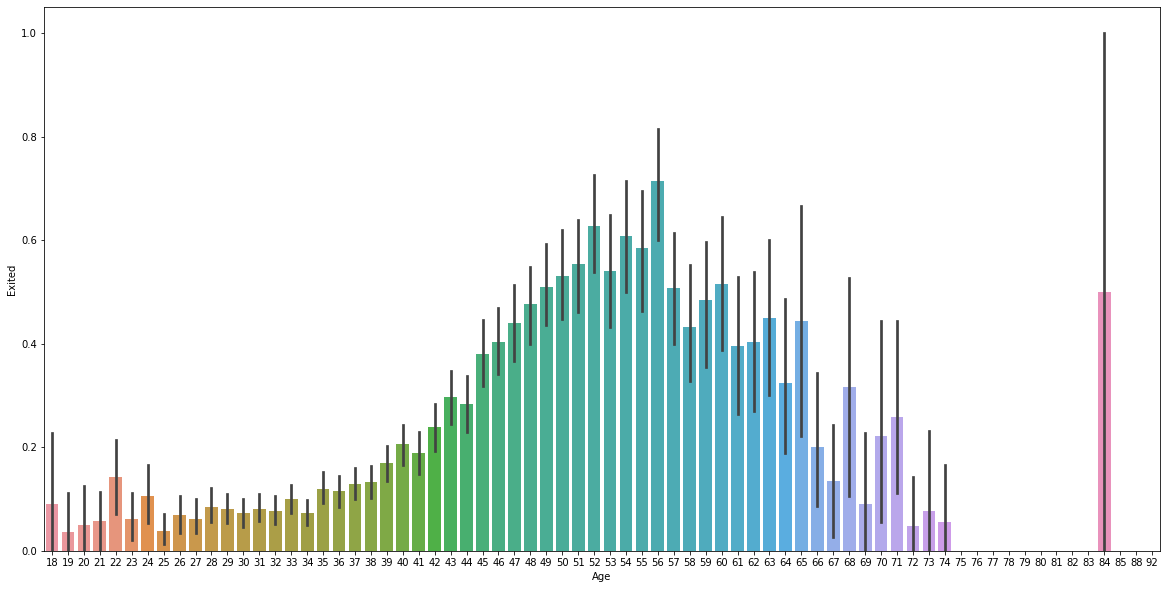

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Age'],y=df['Exited'])
plt.show

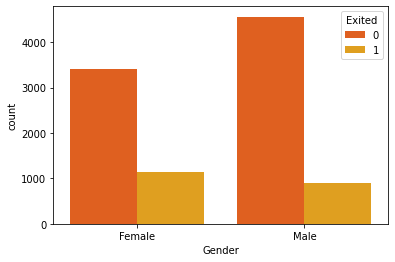

In [ ]:
sns.countplot(x="Gender",hue="Exited",data=df,palette="autumn")


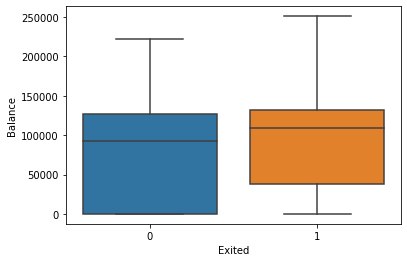

In [ ]:
sns.boxplot(x=df.Exited,y=df.Balance)


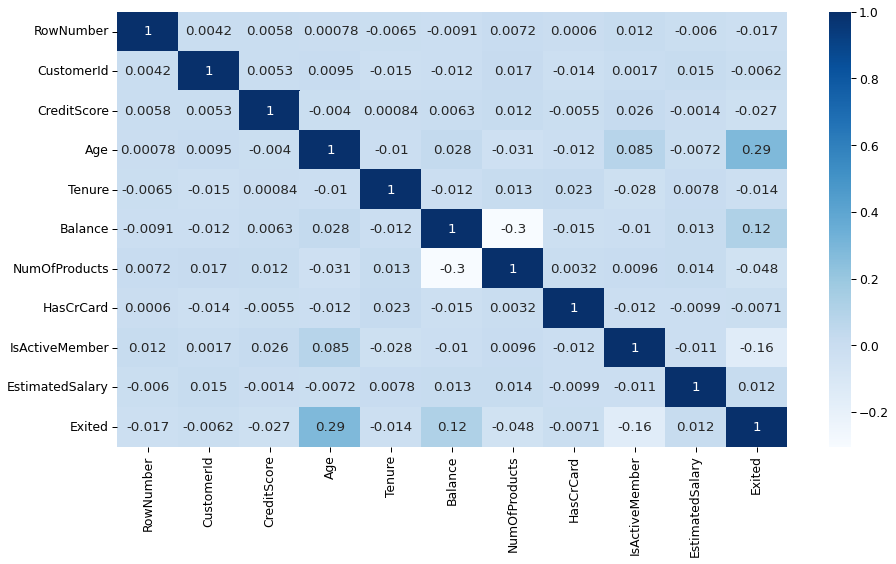

In [ ]:
## MultivariateAnalysis
plt.figure(figsize=(15,8))

sns.set_context('paper',font_scale=1.4)

crash_matrix=df.corr()

sns.heatmap(crash_matrix,annot=True,cmap='Blues')

In [ ]:
## 4.Perform descriptive statistics on the dataset.
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df[df.Exited ==1].Balance.describe()


count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64

In [ ]:
df[df.Exited ==0].Balance.describe()

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


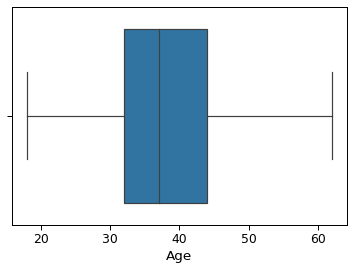

In [ ]:
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1 
whisker_width = 1.5
lower_whisker = q1 -(whisker_width*iqr)
upper_whisker = q3 + (whisker_width*iqr)
df["Age"]=np.where(df["Age"]>upper_whisker,upper_whisker,np.where(df["Age"]<lower_whisker,lower_whisker,df["Age"]))
sns.boxplot(df["Age"])

In [ ]:
##  Check for Categorical columns and perform encoding.

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df["Geography"] = enc.fit_transform(df["Geography"])
df["Gender"] = enc.fit_transform(df["Gender"])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Split the data into dependent and independent variables.

Independent_Vars = df.drop(["Exited"],axis=1)
Independent_Vars.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,0,0,42.0,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,2,0,41.0,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,0,0,42.0,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,0,0,39.0,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,2,0,43.0,2,125510.82,1,1,1,79084.10


In [ ]:
## dependent variables
Depenendent_Vars = df["Exited"]
Depenendent_Vars.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
## Scale the independent variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_data = df.drop(["CustomerId","Surname","RowNumber", "Exited"], axis=1)
numerical_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42.0,2,0.00,1,1,1,101348.88
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57
3,699,0,0,39.0,1,0.00,2,0,0,93826.63
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10


In [ ]:
## Split the data into training and testing

from sklearn.model_selection import train_test_split
final_df = pd.concat([numerical_data,Depenendent_Vars],axis=1)

final_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(numerical_data, Depenendent_Vars, test_size=0.33, random_state=42)


In [ ]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8371,813,1,0,29.0,5,106059.40,1,0,0,187976.88
5027,681,1,1,37.0,8,73179.34,2,1,1,25292.53
9234,642,1,1,49.0,4,120688.61,1,1,0,24770.22
3944,612,0,0,31.0,8,117989.76,1,1,1,54129.86
6862,586,0,1,33.0,9,0.00,1,1,0,6975.02


In [ ]:
y_train.head()

8371    1
5027    0
9234    1
3944    0
6862    0
Name: Exited, dtype: int64

In [ ]:
X_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,1,32.0,3,96709.07,2,0,0,41788.37
4684,623,0,1,43.0,1,0.00,2,1,1,146379.30
1731,601,2,0,44.0,4,0.00,2,1,0,58561.31
4742,506,1,1,59.0,8,119152.10,2,1,1,170679.74
4521,560,2,0,27.0,7,124995.98,1,1,1,114669.79


In [ ]:
y_test.head()

6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64